# NAVER 뉴스 데이터를 이용하여서 데이터 추출하기

## BeautifulSoup, Requests, Pandas 모듈 생성하기

데이터베이스 불러오기

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

뉴스별 데이터베이스 부르기

In [3]:
chosun_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='utf-8', index_col=False)
korean_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
mail_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
midlle_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
money_today_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)
# chosun_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='cp949', index_col=False)
# korean_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
# mail_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
# midlle_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
# money_today_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)


데이터베이스 테스트하기

In [5]:
chosun_eilbo_database = chosun_eilbo_database.dropna()
chosun_eilbo_database

,title,content,url
0,판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성...,https://n.news.naver.com/mnews/article/023/000...
1,이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기...,https://n.news.naver.com/mnews/article/023/000...
2,박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 ...,https://n.news.naver.com/mnews/article/023/000...
3,野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형...,https://n.news.naver.com/mnews/article/023/000...
4,“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에...,https://n.news.naver.com/mnews/article/023/000...
...,...,...,...
27549,[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’,이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할...,https://n.news.naver.com/mnews/article/023/000...
27550,[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리,집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기...,https://n.news.naver.com/mnews/article/023/000...
27551,[차현진의 돈과 세상] [94] 말 한마디,말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새...,https://n.news.naver.com/mnews/article/023/000...
27552,[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑,불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑...,https://n.news.naver.com/mnews/article/023/000...


In [6]:
korean_economy_database = korean_economy_database.dropna()
korean_economy_database

,title,content,url
0,"SRT 탈선 구간 심야 복구…국토부 ""2일 오전 9시 정상화 예상""",대전 조차장역 인근에서 수서행 SRT 열차 탈선 사고가 발생한 가운데 2일 오전 9...,https://n.news.naver.com/mnews/article/015/000...
1,"'트윗 중독' 머스크, 열흘간 이례적 침묵…2017년 이후 처음",일론 머스크 테슬라 최고경영자(CEO)가 열흘 가까이 트윗을 중단했다. 1일(현지시...,https://n.news.naver.com/mnews/article/015/000...
2,"이근 ""한국 고교생, 방학 맞아 우크라이나 들어와…미친 짓""",우크라이나 국제의용군으로 합류한 뒤 귀국한 해군특수전전단(UDT/SEAL) 대위 출...,https://n.news.naver.com/mnews/article/015/000...
3,"美 델타항공 조종사들 뿔났다…""파업 준비됐다"" 업무 과중 호소",미국 델타항공 조종사들이 처우개선을 요구하는 시위에 나섰다. 이들은 자신들의 요구가...,https://n.news.naver.com/mnews/article/015/000...
4,'가상화폐 여왕'의 몰락…5조 사기로 FBI 수배명단 올랐다,'가상화폐 여왕'이라는 별칭으로 알려진 국제사기범 루자 이그나토바가 미국 연방수사국...,https://n.news.naver.com/mnews/article/015/000...
...,...,...,...
52454,[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당,더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 ...,https://n.news.naver.com/mnews/article/015/000...
52455,[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다,현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불...,https://n.news.naver.com/mnews/article/015/000...
52456,"[포토] 라필루스 샨티, '매력적인 미소'",그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M...,https://n.news.naver.com/mnews/article/015/000...
52457,[시론] 북한의 우발적 핵 공격에 대비해야,"컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한...",https://n.news.naver.com/mnews/article/015/000...


In [7]:
mail_economy_database = mail_economy_database
mail_economy_database

,title,content,url
0,"'문명특급' 수지 ""데뷔작 '드림하이' 당시 기억 거의 없어""",'문명특급' 수지가 데뷔작 '드림하이'를 회상했다. 1일 방송된 SBS '문명특급'...,https://n.news.naver.com/mnews/article/009/000...
1,"'나혼산' 김해준, 야성미 자랑 ""섹시한 돌쇠, 머슴같아""",김해준의 야성미에 무지개 회원들이 감탄했다. 1일 밤 방송된 MBC '나 혼자 산다...,https://n.news.naver.com/mnews/article/009/000...
2,"'문명특급' 재재, 수지와 함께 찍은 사진 공개 ""맞팔한 사이"" 너스레",'문명특급' 재재가 수지와 '맞팔' 사이라고 밝혔다. 1일 방송된 SBS '문명특급...,https://n.news.naver.com/mnews/article/009/000...
3,"[종합] '닥터로이어' 소지섭, '父 죽음' 진실 알았다→ 신성록 ""소지섭, 병원장...",'닥터로이어' 소지섭이 아버지의 죽음에 대한 진실을 알았다. 1일 방송된 MBC 금...,https://n.news.naver.com/mnews/article/009/000...
4,"[종합]'왜 오수재인가' 서현진, 허준호 판 흔들었다→황인엽과 동거·애정 확인","서현진이 이경영, 조영진, 허준호 등의 약점을 쥐면서 허준호가 짜놓은 판을 흔들었다...",https://n.news.naver.com/mnews/article/009/000...
...,...,...,...
54581,"[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야","윤석열 대통령이 25일 국회 시정연설에서 ""내년도 예산안은 건전 재정으로 가는 전환...",https://n.news.naver.com/mnews/article/009/000...
54582,"대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]",더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 ...,https://n.news.naver.com/mnews/article/009/000...
54583,[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색,시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에...,https://n.news.naver.com/mnews/article/009/000...
54584,[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠,"■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가...",https://n.news.naver.com/mnews/article/009/000...


In [8]:
midlle_eilbo_database = midlle_eilbo_database.dropna()
midlle_eilbo_database

,title,content,url
0,"유나양 마지막길, 유족은 오지 않았다…장례식 없이 화장",전남 완도 바다에서 숨진 채 발견된 조유나(10)양과 부모가 유족 없이 1일 화장됐...,https://n.news.naver.com/mnews/article/025/000...
2,"박지원 ""대선·지선 승리 이끌고 손절 당해…이준석 안타깝기도""",박지원 전 국정원장은 이준석 국민의힘 대표가 해외순방에서 돌아온 윤석열 대통령을 마...,https://n.news.naver.com/mnews/article/025/000...
3,"[그림사설] 검수완박 논란, 헌재가 빨리 답 내놔야",글=중앙일보 논설실 그림=,https://n.news.naver.com/mnews/article/025/000...
4,"러 ""러-독 연결 가스관 10여일 간 잠정폐쇄…기술 점검 차원""",러시아가 발트해를 통해 독일로 연결되는 '노르트 스트림' 가스관을 이달 중순 10여...,https://n.news.naver.com/mnews/article/025/000...
5,6가지 앎이 암 재발 막는다…'암완치 5년' 지나도 꼭 챙길 이것,통상 암 치료 후 5년이 지나면 완치 판정을 받는다. 이후 환자들은 관리에 소홀한 ...,https://n.news.naver.com/mnews/article/025/000...
...,...,...,...
29008,"감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”",감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하...,https://n.news.naver.com/mnews/article/025/000...
29009,"홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험","40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍...",https://n.news.naver.com/mnews/article/025/000...
29010,"국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다",이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남...,https://n.news.naver.com/mnews/article/025/000...
29011,상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”,최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대...,https://n.news.naver.com/mnews/article/025/000...


In [9]:
money_today_database = money_today_database.dropna()
money_today_database

,title,content,url
0,"현대차 노조 71.8% ""파업 찬성""...4년만에 파업 벌어질까",현대차 노조가 파업을 하는데 뜻을 모았다. 2018년 이후 4년만에 현대차 노조의 ...,https://n.news.naver.com/mnews/article/008/000...
1,"'재결합 불발' 일라이, 지연수에 ""친구로 지낼 마음 없어?""",그룹 '유키스' 출신 일라이가 그의 전 아내 지연수에게 친구로 지내고 싶다는 뜻을 ...,https://n.news.naver.com/mnews/article/008/000...
2,"이혼한 아내에게 재산 분할 안 하려고…2억원 건물 처분한 60대, 실형",이혼한 아내에게 재산이 넘어갈 것을 우려해 건물을 처분한 60대가 실형을 선고받았다...,https://n.news.naver.com/mnews/article/008/000...
3,[속보]뉴욕증시 하락출발...나스닥 0.4%↓,뉴욕증시가 하락 출발했다. 1일(현지시간) 뉴욕증시에서 다우지수와 S&P500지수는...,https://n.news.naver.com/mnews/article/008/000...
4,"'트랜스젠더 유튜버' 풍자 ""신검 받다 그 자리서 울어""…무슨 사연?",트랜스젠더 유튜버 풍자(본명 윤보미)가 과거 성전환 수술 후 받은 신체검사에서 '현...,https://n.news.naver.com/mnews/article/008/000...
...,...,...,...
49205,[광화문]청문회 대상은 국회다,판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주...,https://n.news.naver.com/mnews/article/008/000...
49206,머니투데이 오프라인 헤드라인-26일자,"""대형증권사, 제2 채안펀드 1조 만들라"" 촉법소년 '만 13세' 하향…""더 낮춰야...",https://n.news.naver.com/mnews/article/008/000...
49207,"[사기의 세계]""하루 300만원 수익"" 달콤한 유혹에 수천만원 날렸다",34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시...,https://n.news.naver.com/mnews/article/008/000...
49208,[MT시평]금융업의 본질은 신뢰다,동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 ...,https://n.news.naver.com/mnews/article/008/000...


표본별 뉴스 제목중 하나 부르기

In [12]:
chosun_eilbo_database['title'][0]

'판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…'

뉴스 출처 홈페이지 추출하기

In [13]:
chosun_eilbo_database['url'][0]

'https://n.news.naver.com/mnews/article/023/0003701167'

## 깃허브 오픈소스 이용하기

### 토큰화로 바꾸는 파일 부르기

In [14]:
# $ git clone https://github.com/ukairia777/tensorflow-nlp-tutorial.git
# $ git clone https://github.com/haven-jeon/PyKoSpacing.git
# $ git clone https://github.com/ssut/py-hanspell.git
# %pip install soynlp
# %pip install customized_konlpy
# %pip install tensorflow
# %pip install kss
# %pip install konlpy
# %pip install soynlp
# %pip install customized_konlpy

In [15]:
from tokenization import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']
문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of 

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']
단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]
OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']
꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'N

In [16]:
from text_preprocessing_tools_for_korean_text import *

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.
1/1 [==============================] - 2s 2s/step
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지
김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나

C:\Users\82105\AppData\Roaming\Python\Python38\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


url 홈페이지 BeautifulSoup을이용해서 소스에 있는 내용 부르기

뉴스 내용항목 중 한국어 불용어 제거하기

In [17]:
from remove_stopwords import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


문장 텍스트 정규화하기

In [18]:
from regular_expression import *

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 
['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [19]:
from integer_encoding import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']
[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}
8
[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good'

## TF-IDF를 이용하여 벡터화하기

In [20]:
from kiwipiepy import Kiwi

In [21]:
from tf_idf import *

단어장의 크기 : 9
['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [24]:
kiwi = Kiwi()
def extract_noun_from_kiwi_analyzed(comment):
    temp_sentence = kiwi.analyze(comment)
    noun_list = [token.form for token in temp_sentence[0][0] if re.match('N', token.tag)]
    return noun_list

## 100개의 특정표본을 이용하여서 처리화하기

### 조선일보 100개의 표본 이용하기

제목 단어 토큰화하기

In [25]:
whole_title_noun = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_title_noun.append(noun)
print(whole_title_noun)

['대나무', '이준석', '변호인', '변호사회', '박지현', '이광재', '시누이', '메탄올', '백악관', '귀국길', '지휘관', '오데사', '아파트', '쑥대밭', '목구멍', '길거리', '대통령', '지지율', '휠체어', '민주당', '이재명', '박지현', '포르노', '위원장', '성적표', '민노총', '녹취록', '서포터즈', '일요일', '아버지', '냉장고', '토요일', '이재명', '우크라', '의용군', '목소리', '구청장', '인터뷰', '오승록', '노원구', '일자리', '바이오', '구청장', '인터뷰', '박강수', '마포구청장', '구청장', '인터뷰', '송파구청', '아파트', '구청장', '인터뷰', '도봉구청', '도봉구', '오페라하우스', '넷플릭스', '창업자', '현대차', '지난달', '반도체', '시뮬레이션', '공무원', '크레인', '스타트업', '대전조차장역', '공무원', '스스로', '기록물', '김어준', '아이파크', '현대산업개발', '취임식', '단체장', '대우조선', '노동자', '이종호', '마지막', '장례식', '모정미씨', '지역민', '호민관', '성희롱', '한미일', '이문열', '연구소', '잿더미', '고등학생', '기증자', '김지수', '창신동', '쪽방촌', '디즈니', '다가구', '다세대', '임차인', '다단계', '조희팔', '사모당', '온라인', '코스피', '러시아', '민형배', '해외여행', '숭례문', '유가족', '어머니', '수면제', '바이든', '노룩악수', '조희연', '대립각', '대부업체', '대통령', '르메이에르', '입주자', '이준석', '대통령', '캐나다', '김건희', '휴가지', '네이버', '토트넘', '라인업']


내용 토큰화하기

In [26]:
whole_content_sentence_list = []
count = 1
for chosun_url in chosun_eilbo_database.head(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(chosun_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_content_sentence_list.append(regular_expression_sentence)
    
    # print()
    # count += 1
# print(whole_content_sentence_list)

1/1 [==============================] - 0s 68ms/step


In [27]:
whole_content_noun = []
count = 1
for content in whole_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_content_noun.append(noun)

print(whole_content_noun)

1/1 [==============================] - 0s 56ms/step
['대나무', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트', '락토스', '대나무', '윈난성', '자오퉁시', '락토스', '자이언트', '손가락', '뉴시스', '대나무', '전문가', '그동안', '현대판', '대나무', '몸무게', '갈고리', '대나무', '육식성', '대나무', '연합뉴스', '변호사회', '이준석', '변호인', '호국단', '이준석', '변호인', '변호사', '공동정범', '대한변호사협회', '변호사', '변호사회', '지난달', '변호사회', '녹취록', '녹취록', '변호사', '공동정범', '확인서', '비대위원장', '민형배', '박지현', '더불어민주당', '위원장', '여의도', '그린벨트', '민주당', '정치인', '박지현', '더불어민주당', '위원장', '이광재', '민주당', '온라인', '위원장', '아버지', '위원장', '위원장', '페이스북', '박지현', '이광재', '위원장', '박지현', '유튜버', '민주당', '조유나', '민주당', '지지자', '민주당', '정치인', '민주당', '민형배', '민형배', '위원장', '온정주의', '민형배', '위원장', '위원장', '민주당', '자연대', '그린벨트', '위원장', '이재명', '위원장', '컷오프', '이재명', '위원장', '이재명', '위원장', '비대위원장', '이재명', '위원장', '한동안', '목소리', '강병원', '박용진', '민형배', '강경파', '더불어민주당', '강병원', '오른쪽', '여의도', '박용진', '이재명', '연합뉴스', '더불어민주당', '반성문', '민주당', '독재자', '민주당', '강병원', '인터뷰', '강경파', '포인트', '상임위', '민주당', '민형배', '박용진', '대해민', '페이스북', '본회의', '민주당', '민주당', '찬성표', '관계자', '이재명'

In [28]:
len(whole_content_noun)

4092

제목 내용 토큰화된 것들 결합하기

In [29]:
title_content_vocab = list(set(whole_title_noun + whole_content_noun))
title_content_vocab.sort()
len(title_content_vocab)

1543

제목 TF, TF-IDF이용해서 벡터행렬화하기

In [30]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    d2 = chosun_eilbo_database.head(100)["title"][i]
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tf(t, d2))

# len(result)
title_tf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tfidf(t, d))

# len(result)
title_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tfidf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


제목 tf, tf-idf를 csv에다가 저장하기

In [32]:
title_tf_.to_csv("title_tf.csv", encoding='utf-8-sig')

In [33]:
title_tfidf_.to_csv("title_tfidf.csv", encoding='utf-8-sig')

내용 추출한 것을 tf-idf, tf을 이용하여서 벡터행렬화하기

In [34]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tf(t, d))

# len(result)
content_tf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["content"])
content_tf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
content,,,,,,,,,,,,,,,,,,,,,
통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배 복당 반대 강경파 ‘처럼회’ 해체도 요구 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 긴급 체포됐다. 1일 서울 동작경찰서는 전날 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰된 것은 상당히 적절하지 않다고 생각한다”고 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점 정도”라며 긍정적으로 평가했다. 박 전 원 …,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거로움이 줄어들 전망이다. 네이버는 AI검색 …",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tfidf(t, d))

# len(result)
content_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
content_tfidf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
content_tf_.to_csv("content_tf.csv", encoding = 'utf-8-sig')
content_tfidf_.to_csv("content_tfidf.csv", encoding='utf-8-sig')

cos_simliarity를 이용해서 벡터행렬화하기

In [39]:
from cosine_similarity import *

In [42]:
cos_sim = dot(content_tf_.values,title_tf_.values.T)/(norm(title_tf_.values) * norm(content_tf_.values))
cos_sim_tfidf = dot(content_tfidf_.values,title_tfidf_.values.T)/(norm(title_tfidf_.values) * norm(content_tfidf_.values))
print(cos_sim)
print(cos_sim_tfidf)
cos_sim_ =pd.DataFrame(cos_sim, columns=chosun_eilbo_database.head(100)["content"], index = chosun_eilbo_database.head(100)["title"])

[[0.00335174 0.         0.         ... 0.         0.         0.        ]
 [0.         0.0071823  0.         ... 0.         0.         0.        ]
 [0.         0.         0.00287292 ... 0.         0.00047882 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.00335174 0.         0.         ... 0.         0.         0.        ]
 [0.         0.0071823  0.         ... 0.         0.         0.        ]
 [0.         0.         0.00287292 ... 0.         0.00047882 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [43]:
cos_sim_

content,통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이 …,“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …,비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …,강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배 복당 반대 강경파 ‘처럼회’ 해체도 요구 …,시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 긴급 체포됐다. 1일 서울 동작경찰서는 전날 …,지난 5월 정식 개장 이후 ‘주차료 갑질’ 논란에 휘말렸던 춘천 레고랜드가 결국 주차요금을 인하했다. 1시간이 넘으면 무조건 1 …,“환경청이 권한 넘는 규제” 주정부·석탄회사 손 들어줘 바이든 정부·환경단체 반발 “퇴행적이고 파괴적인 결정” 연방대법관에 첫 …,야권 원로인 박지원 전 국정원장은 이준석 국민의힘 대표가 해외순방에서 돌아온 윤석열 대통령을 마중 나간 것과 관련 “(이 대표의 …,美와 협상에서는 걸림돌 돼 이란 정권 수호의 ‘최후 보루’이자 최고의 권력기관인 최정예 ‘혁명수비대’가 최근 잇따라 이상 징후를 …,“어린이 포함해 최소 18명 사망” 러시아군이 1일(현지 시각) 우크라이나 남부 항구도시 오데사에 미사일 공습을 가했다. 아파트 …,...,“사실관계 잘 몰라” 유권해석 사실상 거부 국민권익위원회가 문재인 정부에서 해양수산부 공무원 이대준씨를 월북자로 판단하는 과정이 …,1일 오전 10시 25분쯤 서울 종로구 르메이에르 빌딩이 흔들렸다는 신고가 들어와 소방당국이 원인을 파악에 나섰다. 오전 10시 …,G20 의장국 인도네시아 조코위 대통령 29~30일 잇달아 젤렌스키·푸틴 만나 조코 위도도(조코위) 인도네시아 대통령이 지난 2 …,국민의힘 이준석 대표가 1일 나토(북대서양조약기구) 정상회의 순방에서 돌아온 윤석열 대통령을 마중 나갔다. 성 상납 등의 의혹으 …,"정부가 물가 안정을 위해 수입 돈육·밀가루·대두유 등에 할당관세를 적용하고, 김치·장류·커피 등에 부가가치세를 면제하는 조치를 …",국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰된 것은 상당히 적절하지 않다고 생각한다”고 …,박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점 정도”라며 긍정적으로 평가했다. 박 전 원 …,"앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거로움이 줄어들 전망이다. 네이버는 AI검색 …",오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓자 ‘암표와의 전쟁’ 나선 사람들 [세상의 …,‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 둠(doom·파멸)’으로 알려진 누리엘 루비 …
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.003352,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.000000,0.007182,0.000000,0.0,0.000000,0.0,0.0,0.001436,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001436,0.0,0.000000,0.000000
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.000000,0.000000,0.002873,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000479,0.000000
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000479,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.000000,0.000000,0.000000,0.0,0.002873,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.001436,0.0,0.0,0.000000,0.001436,0.0,0.001915,0.000000
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000479,0.0,0.0,...,0.0,0.0,0.003352,0.0,0.0,0.000479,0.003352,0.0,0.000000,0.001436
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [44]:
cos_sim_tfidf_ =pd.DataFrame(cos_sim_tfidf, columns=chosun_eilbo_database.head(100)["content"], index = chosun_eilbo_database.head(100)["title"])
cos_sim_tfidf_

content,통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이 …,“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …,비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …,강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배 복당 반대 강경파 ‘처럼회’ 해체도 요구 …,시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 긴급 체포됐다. 1일 서울 동작경찰서는 전날 …,지난 5월 정식 개장 이후 ‘주차료 갑질’ 논란에 휘말렸던 춘천 레고랜드가 결국 주차요금을 인하했다. 1시간이 넘으면 무조건 1 …,“환경청이 권한 넘는 규제” 주정부·석탄회사 손 들어줘 바이든 정부·환경단체 반발 “퇴행적이고 파괴적인 결정” 연방대법관에 첫 …,야권 원로인 박지원 전 국정원장은 이준석 국민의힘 대표가 해외순방에서 돌아온 윤석열 대통령을 마중 나간 것과 관련 “(이 대표의 …,美와 협상에서는 걸림돌 돼 이란 정권 수호의 ‘최후 보루’이자 최고의 권력기관인 최정예 ‘혁명수비대’가 최근 잇따라 이상 징후를 …,“어린이 포함해 최소 18명 사망” 러시아군이 1일(현지 시각) 우크라이나 남부 항구도시 오데사에 미사일 공습을 가했다. 아파트 …,...,“사실관계 잘 몰라” 유권해석 사실상 거부 국민권익위원회가 문재인 정부에서 해양수산부 공무원 이대준씨를 월북자로 판단하는 과정이 …,1일 오전 10시 25분쯤 서울 종로구 르메이에르 빌딩이 흔들렸다는 신고가 들어와 소방당국이 원인을 파악에 나섰다. 오전 10시 …,G20 의장국 인도네시아 조코위 대통령 29~30일 잇달아 젤렌스키·푸틴 만나 조코 위도도(조코위) 인도네시아 대통령이 지난 2 …,국민의힘 이준석 대표가 1일 나토(북대서양조약기구) 정상회의 순방에서 돌아온 윤석열 대통령을 마중 나갔다. 성 상납 등의 의혹으 …,"정부가 물가 안정을 위해 수입 돈육·밀가루·대두유 등에 할당관세를 적용하고, 김치·장류·커피 등에 부가가치세를 면제하는 조치를 …",국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰된 것은 상당히 적절하지 않다고 생각한다”고 …,박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점 정도”라며 긍정적으로 평가했다. 박 전 원 …,"앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거로움이 줄어들 전망이다. 네이버는 AI검색 …",오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓자 ‘암표와의 전쟁’ 나선 사람들 [세상의 …,‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 둠(doom·파멸)’으로 알려진 누리엘 루비 …
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.003352,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.000000,0.007182,0.000000,0.0,0.000000,0.0,0.0,0.001436,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001436,0.0,0.000000,0.000000
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.000000,0.000000,0.002873,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000479,0.000000
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000479,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.000000,0.000000,0.000000,0.0,0.002873,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.001436,0.0,0.0,0.000000,0.001436,0.0,0.001915,0.000000
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000479,0.0,0.0,...,0.0,0.0,0.003352,0.0,0.0,0.000479,0.003352,0.0,0.000000,0.001436
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [45]:
cos_sim.shape

(100, 100)

제목 토큰화수 딕셔너리 형태로 구하기

In [46]:
whole_title_sentence = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    title = ''
    for i in list1:
        title+=i
    whole_title_sentence.append(title)
print(whole_title_sentence)
            

['판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…', '이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”', '박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”', '野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드', '“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성', '1시간 넘으면 1만8000원… ‘주차비 갑질’ 레고랜드, 결국 내렸다', '美연방대법원, 낙태 이어 온실가스 규제도 제동 백악관 “퇴행적 결정”', '박지원 “이준석, 尹 귀국길 마중 나갔어도 운명은 안 바뀐다”', '이란 정권의 ‘보루’ 혁명수비대, 이상 징후지휘관들 숙청·사망 잇따라', '‘뱀섬’ 내주고 분했나… 러軍, 오데사 아파트 쑥대밭 만들었다', '피살공무원 친형 “文, 라면이 목구멍으로 넘어가나…유족 조롱”', '이탈리아 패션 기업 ‘제냐’ 회장, 서울 길거리 패션 보고 놀란 이유', '인사 논란·당내 갈등 尹대통령·국힘 지지율 3주째 함께 하락', '이준석, ‘전장연 시위’에 “휠체어 체험하던 민주당이 해결하라”', '이재명이 영입한 박지현 “李 전대 불출마해야…저는 출마 고민 중”', '“내 딸이 포르노 영상에 왜?”…친구 얼굴 합성해 유포한 고교생들', '‘빈센트’ 부른 돈 매클린, 동화작가 됐다', '메르켈, 퇴임 후 첫 직책은 인권상 심사위원장', '[단독] 고용부, KBS 드라마 ‘미남당’ 제작사 근로감독 착수, 이유는?', '민주, 첫 해외순방 마친 尹부부에 악평 “옷만 화려” “성적표 초라”', '검찰, 작년 전국서 불법 시위한 민노총 30여명 기소', '“논물 속 가재도 빨갛게 익었다” 日 40도 폭염 인증 사진 한 장', '이준석 “성상납도, 증거인멸도 안 했다… 녹취록은 편집된 조각들”', '“꺼져가는 생명 살리는 장기기증, 널리 알려요”…학생 서포터즈 부산서 출범', '유나양 아빠, 코인 10여종에 1억3000만원 투자 2000만원 잃었다', '한달만에 등장한 박지현 “전대 출마 고민 중

In [47]:
title_vocab = {}
preprocessed_titles = []
for sentence in whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in title_vocab:
                title_vocab[word] = 0 
            title_vocab[word] += 1
            preprocessed_titles.append(word) 
print(title_vocab)
print(preprocessed_titles)

{'대나무': 1, '이준석': 5, '변호인': 1, '변호사회': 1, '박지현': 3, '이광재': 1, '시누이': 1, '메탄올': 1, '주차비': 1, '레고랜드': 1, '연방대법원': 1, '백악관': 1, '박지원': 2, '귀국길': 1, '수비대': 1, '지휘관': 1, '오데사': 1, '아파트': 2, '쑥대밭': 1, '공무원': 3, '목구멍': 1, '이탈리아': 1, '길거리': 1, '대통령': 3, '지지율': 1, '휠체어': 1, '민주당': 1, '이재명': 2, '포르노': 1, '빈센트': 1, '메르켈': 1, '위원장': 1, '고용부': 1, '드라마': 1, '제작사': 1, '성적표': 1, '민노총': 1, '녹취록': 1, '서포터즈': 1, '일요일': 1, '멕시코': 1, '아버지': 1, '냉장고': 1, '토요일': 1, '우크라': 1, '의용군': 1, '구청장': 6, '인터뷰': 6, '박희영': 1, '용산구': 1, '용산정': 1, '목소리': 2, '오승록': 1, '노원구': 1, '일자리': 1, '바이오': 1, '박강수': 1, '마포구청장': 1, '송파구청': 1, '도봉구청': 1, '도봉구': 1, '정원오': 1, '성동구': 1, '레미콘': 1, '오페라하우스': 1, '넷플릭스': 2, '창업자': 1, '현대차': 1, '지난달': 2, '반도체': 1, '시뮬레이션': 1, '크레인': 1, '스타트업': 1, '서울행': 1, '대전조차장역': 1, '스스로': 1, '기록물': 1, '김어준': 1, '아이파크': 1, '현대산업개발': 1, '단체장': 1, '대우조선': 1, '노동자': 2, '서울대': 1, '이종호': 1, '마지막': 1, '장례식': 1, '모정미씨': 1, '지역민': 1, '호민관': 1, '포스코': 1, '성폭력': 1, '가해자': 1, '성희롱': 1, '한미일': 1, '이문열': 1, '연구소': 1, '잿더

In [48]:
counter = Counter(preprocessed_titles)
counter

Counter({'대나무': 1,
         '이준석': 5,
         '변호인': 1,
         '변호사회': 1,
         '박지현': 3,
         '이광재': 1,
         '시누이': 1,
         '메탄올': 1,
         '주차비': 1,
         '레고랜드': 1,
         '연방대법원': 1,
         '백악관': 1,
         '박지원': 2,
         '귀국길': 1,
         '수비대': 1,
         '지휘관': 1,
         '오데사': 1,
         '아파트': 2,
         '쑥대밭': 1,
         '공무원': 3,
         '목구멍': 1,
         '이탈리아': 1,
         '길거리': 1,
         '대통령': 3,
         '지지율': 1,
         '휠체어': 1,
         '민주당': 1,
         '이재명': 2,
         '포르노': 1,
         '빈센트': 1,
         '메르켈': 1,
         '위원장': 1,
         '고용부': 1,
         '드라마': 1,
         '제작사': 1,
         '성적표': 1,
         '민노총': 1,
         '녹취록': 1,
         '서포터즈': 1,
         '일요일': 1,
         '멕시코': 1,
         '아버지': 1,
         '냉장고': 1,
         '토요일': 1,
         '우크라': 1,
         '의용군': 1,
         '구청장': 6,
         '인터뷰': 6,
         '박희영': 1,
         '용산구': 1,
         '용산정': 1,
         '목소리': 2,
      

제목 워드클라우드로 시각화하기

In [49]:
from wordcloud import WordCloud

In [50]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(counter)

In [51]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

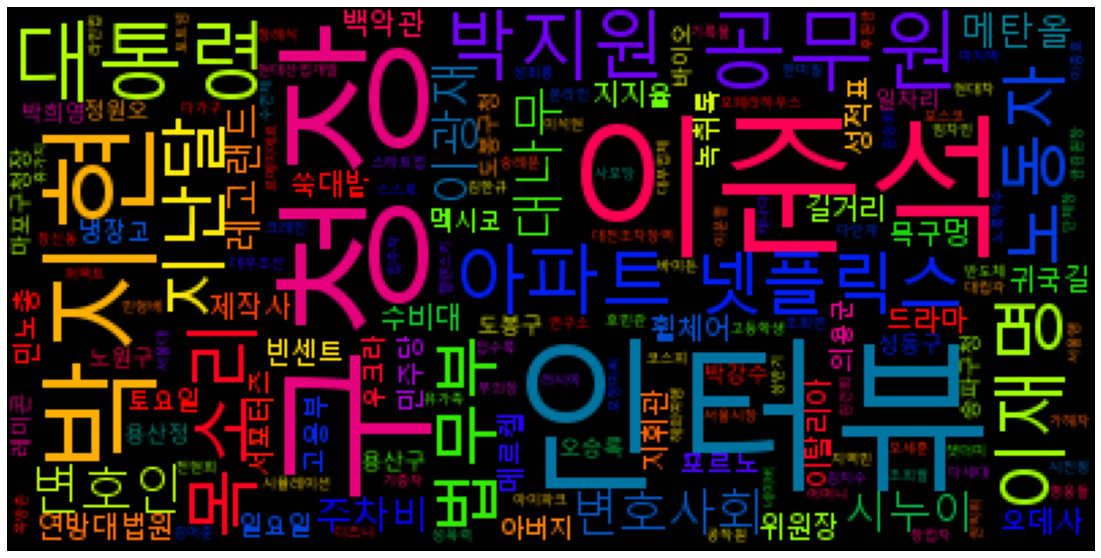

In [52]:
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

내용 토큰화수 딕셔너리 형태로 구하기

In [53]:
content_vocab = {}
preprocessed_contents = []
for sentence in whole_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in content_vocab:
                content_vocab[word] = 0 
            content_vocab[word] += 1
            preprocessed_contents.append(word) 
print(content_vocab)
print(preprocessed_contents)

{'.픽사베': 1, '대나무': 6, '로스앤젤레스': 1, '자연사': 1, '박물관': 4, '왕샤오밍': 1, '자이언트': 3, '락토스': 2, '윈난성': 1, '손가락': 1, '판다가짜엄지': 1, '뉴시스': 7, '전문가': 12, '현대판': 1, '몸무게': 1, '갈고리': 1, '육식성': 1, '연합뉴스': 20, '변호사회': 3, '이준석': 16, '변호인': 2, '호국단': 1, '변호사': 11, '공동정범': 2, '대한변호사협회': 1, '지난달': 74, '연구소': 11, '녹취록': 3, '확인서': 3, '비대위원장': 5, '민형배': 8, '박지현': 11, '더불어민주당': 25, '위원장': 52, '여의도': 10, '그린벨트': 8, '민주당': 48, '정치인': 6, '이광재': 2, '온라인': 37, '아버지': 12, '페이스북': 12, '사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다': 1, '‘조유나': 1, '일가족': 5, '지지자': 1, '온정주의': 1, '출마자': 3, '이재명': 18, '컷오프': 2, '한동안': 4, '목소리': 15, '강병원': 4, '박용진': 3, '강경파': 4, '처럼회': 1, '오른쪽': 5, '반성문': 1, '독재자': 1, '인터뷰': 13, '포인트': 14, '상임위': 1, '.처럼회': 1, '.대해민': 1, '본회의': 2, '찬성표': 1, '관계자': 39, '이재명리기': 1, '시누이': 4, '서울동작경찰서': 1, '동작구': 1, '메탄올': 2, '레고랜드': 7, '‘주차료': 1, '주차장': 3, '테마파크': 1, '장애인': 5, '스티커': 3, '안전사고': 2, '환경청': 4, '행정부': 4, '발전소': 10, '온실가스': 4, '뉴욕타임스': 3, '바이든': 26, '대통령': 192, '미국연방대법원': 1, '워싱턴': 3, '광범위': 2, '배출량': 1, '로이터': 8, '

In [54]:
content_counter = Counter(preprocessed_contents)
content_counter

Counter({'.픽사베': 1,
         '대나무': 6,
         '로스앤젤레스': 1,
         '자연사': 1,
         '박물관': 4,
         '왕샤오밍': 1,
         '자이언트': 3,
         '락토스': 2,
         '윈난성': 1,
         '손가락': 1,
         '판다가짜엄지': 1,
         '뉴시스': 7,
         '전문가': 12,
         '현대판': 1,
         '몸무게': 1,
         '갈고리': 1,
         '육식성': 1,
         '연합뉴스': 20,
         '변호사회': 3,
         '이준석': 16,
         '변호인': 2,
         '호국단': 1,
         '변호사': 11,
         '공동정범': 2,
         '대한변호사협회': 1,
         '지난달': 74,
         '연구소': 11,
         '녹취록': 3,
         '확인서': 3,
         '비대위원장': 5,
         '민형배': 8,
         '박지현': 11,
         '더불어민주당': 25,
         '위원장': 52,
         '여의도': 10,
         '그린벨트': 8,
         '민주당': 48,
         '정치인': 6,
         '이광재': 2,
         '온라인': 37,
         '아버지': 12,
         '페이스북': 12,
         '사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다': 1,
         '‘조유나': 1,
         '일가족': 5,
         '지지자': 1,
         '온정주의': 1,
         '출마자': 3,
         '이재명': 18,
        

(-0.5, 399.5, 199.5, -0.5)

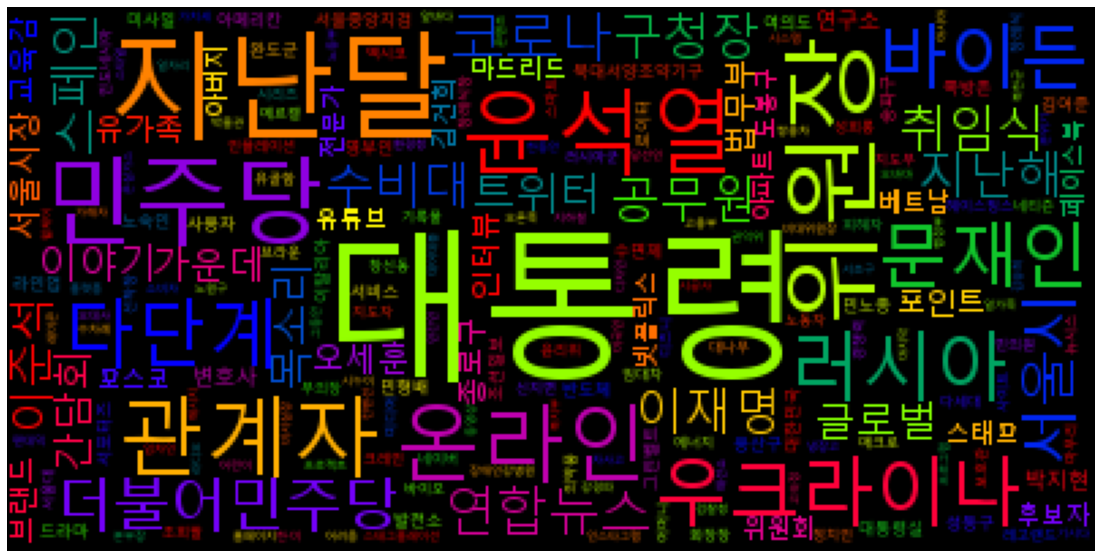

In [55]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

In [56]:
cos_sim_.to_csv("tfcos_sim.csv", encoding='utf-8-sig')
cos_sim_tfidf_.to_csv("tfidfcos_sim.csv", encoding='utf-8-sig')

## 전체 표본 이용하여서 tf-idf 데이터 유사도 추출하기

### 조선일보의 데이터 유사성 구하기

In [57]:
whole_chosun_title_noun = []
for chosun_title in chosun_eilbo_database["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_chosun_title_noun.append(noun)

In [58]:
whole_chosun_content_sentence_list = []
count = 1
for chosun_url in chosun_eilbo_database["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(chosun_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_chosun_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_chosun_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 101ms/step


ConnectionError: ('Connection aborted.', OSError(0, 'Error'))

In [ ]:
whole_chosun_content_noun = []
count = 1
for content in whole_chosun_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_chosun_content_noun.append(noun)

In [ ]:
chosun_title_content_vocab = list(set(whole_chosun_title_noun + whole_chosun_content_noun))
chosun_title_content_vocab.sort()

In [ ]:
chosun_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database["title"])):
  chosun_title_tfidf_result.append([])
  try:
    d = chosun_eilbo_database["title"][i]
  except KeyError:
    for j in range(len(chosun_title_content_vocab)):
      chosun_title_tfidf_result[-1].append(0)
  else:
    d2 = chosun_eilbo_database["title"][i]
    for j in range(len(chosun_title_content_vocab)):
      t = chosun_title_content_vocab[j]
      chosun_title_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
chosun_title_tfidf_ = pd.DataFrame(chosun_title_tfidf_result, columns=chosun_title_content_vocab, index=chosun_eilbo_database["title"])
chosun_title_tfidf_

In [ ]:
chosun_title_tfidf_.to_csv("chosun_title_tfidf.csv", encoding='utf-8-sig')

In [ ]:
chosun_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_chosun_content_sentence_list)):
  chosun_content_tfidf_result.append([])
  try:
    d = whole_chosun_content_sentence_list[i]
  except KeyError:
    for j in range(len(chosun_title_content_vocab)):
        chosun_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_chosun_content_sentence_list[i]
    for j in range(len(chosun_title_content_vocab)):
      t = chosun_title_content_vocab[j]
      chosun_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
chosun_content_tfidf_ = pd.DataFrame(chosun_content_tfidf_result, columns=chosun_title_content_vocab, index=chosun_eilbo_database["content"])
chosun_content_tfidf_

In [ ]:
chosun_cos_sim_tfidf = dot(chosun_content_tfidf_.values, chosun_title_tfidf_.values.T)/(norm(chosun_title_tfidf_.values) * norm(chosun_content_tfidf_.values))
chosun_cos_sim_tfidf_ =pd.DataFrame(chosun_cos_sim_tfidf, columns=chosun_eilbo_database["content"], index = chosun_eilbo_database["title"])

In [ ]:
chosun_cos_sim_tfidf_.to_csv("chosun_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [ ]:
chosun_whole_title_sentence = []
for chosun_title in chosun_eilbo_database["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    title = ''
    for i in list1:
        title+=i
    chosun_whole_title_sentence.append(title)

In [ ]:
chosun_title_vocab = {}
chosun_preprocessed_titles = []
for sentence in chosun_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in chosun_title_vocab:
                chosun_title_vocab[word] = 0 
            chosun_title_vocab[word] += 1
            chosun_preprocessed_titles.append(word)
chosun_title_counter = Counter(chosun_preprocessed_titles)
print(chosun_title_counter)

In [ ]:
chosun_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(chosun_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(chosun_title_word_cloud)
plt.axis('off')

내용 토큰화수 딕셔너리 형태로 구하기

In [ ]:
chosun_content_vocab = {}
chosun_preprocessed_contents = []
for sentence in whole_chosun_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in chosun_content_vocab:
                chosun_content_vocab[word] = 0 
            chosun_content_vocab[word] += 1
            chosun_preprocessed_contents.append(word) 
chosun_content_counter = Counter(chosun_preprocessed_contents)
chosun_content_counter

In [ ]:
chosun_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(chosun_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(chosun_content_cloud)
plt.axis('off')

### 한국경제의 데이터 유사성 구하기

In [ ]:
whole_korean_title_noun = []
for korean_title in korean_economy_database["title"]:
    kospacing_title_list = []
    list1 = str(korean_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_korean_title_noun.append(noun)

In [ ]:
whole_korean_content_sentence_list = []
count = 1
for korean_url in korean_economy_database["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(korean_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_korean_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_korean_content_sentence_list.append(regular_expression_sentence)

In [ ]:
whole_korean_content_noun = []
count = 1
for content in whole_korean_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_korean_content_noun.append(noun)

In [ ]:
korean_title_content_vocab = list(set(whole_korean_title_noun + whole_korean_content_noun))
korean_title_content_vocab.sort()

In [ ]:
korean_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(korean_economy_database["title"])):
  korean_title_tfidf_result.append([])
  try:
    d = korean_economy_database["title"][i]
  except KeyError:
    for j in range(len(korean_title_content_vocab)):
      korean_title_tfidf_result[-1].append(0)
  else:
    d2 = korean_economy_database["title"][i]
    for j in range(len(korean_title_content_vocab)):
      t = korean_title_content_vocab[j]
      korean_title_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
korean_title_tfidf_ = pd.DataFrame(korean_title_tfidf_result, columns=korean_title_content_vocab, index=korean_economy_database["title"])
korean_title_tfidf_

In [ ]:
korean_title_tfidf_.to_csv("korean_title_tfidf.csv", encoding='utf-8-sig')

In [ ]:
korean_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_korean_content_sentence_list)):
  korean_content_tfidf_result.append([])
  try:
    d = whole_korean_content_sentence_list[i]
  except KeyError:
    for j in range(len(korean_title_content_vocab)):
        korean_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_korean_content_sentence_list[i]
    for j in range(len(korean_title_content_vocab)):
      t = korean_title_content_vocab[j]
      korean_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
korean_content_tfidf_ = pd.DataFrame(korean_content_tfidf_result, columns=korean_title_content_vocab, index=korean_economy_database["content"])
korean_content_tfidf_

In [ ]:
korean_cos_sim_tfidf = dot(korean_content_tfidf_.values, korean_title_tfidf_.values.T)/(norm(korean_title_tfidf_.values) * norm(korean_content_tfidf_.values))
korean_cos_sim_tfidf_ =pd.DataFrame(korean_cos_sim_tfidf, columns=korean_economy_database["content"], index = korean_economy_database["title"])

In [ ]:
korean_cos_sim_tfidf_.to_csv("korean_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [ ]:
korean_whole_title_sentence = []
for korean_title in korean_economy_database["title"]:
    kospacing_title_list = []
    list1 = str(korean_title).split('.')
    title = ''
    for i in list1:
        title+=i
    korean_whole_title_sentence.append(title)

In [ ]:
korean_title_vocab = {}
korean_preprocessed_titles = []
for sentence in korean_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in korean_title_vocab:
                korean_title_vocab[word] = 0 
            korean_title_vocab[word] += 1
            korean_preprocessed_titles.append(word)
korean_title_counter = Counter(korean_preprocessed_titles)
# print(korean_title_counter)

In [ ]:
korean_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(korean_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(korean_title_word_cloud)
plt.axis('off')

In [ ]:
korean_content_vocab = {}
korean_preprocessed_contents = []
for sentence in whole_korean_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in korean_content_vocab:
                korean_content_vocab[word] = 0 
            korean_content_vocab[word] += 1
            korean_preprocessed_contents.append(word) 
korean_content_counter = Counter(korean_preprocessed_contents)
korean_content_counter

In [ ]:
korean_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(korean_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(korean_content_cloud)
plt.axis('off')

### 매일경제 데이터 유사성 구하기

In [ ]:
whole_mail_title_noun = []
for mail_title in mail_economy_database["title"]:
    kospacing_title_list = []
    list1 = str(mail_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_mail_title_noun.append(noun)

In [ ]:
whole_mail_content_sentence_list = []
count = 1
for mail_url in mail_economy_database["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(mail_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_mail_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_mail_content_sentence_list.append(regular_expression_sentence)

In [ ]:
whole_mail_content_noun = []
count = 1
for content in whole_mail_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_mail_content_noun.append(noun)

In [ ]:
mail_title_content_vocab = list(set(whole_mail_title_noun + whole_mail_content_noun))
mail_title_content_vocab.sort()

In [ ]:
mail_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(mail_economy_database["title"])):
  mail_title_tfidf_result.append([])
  try:
    d = mail_economy_database["title"][i]
  except KeyError:
    for j in range(len(mail_title_content_vocab)):
      mail_title_tfidf_result[-1].append(0)
  else:
    d2 = mail_economy_database["title"][i]
    for j in range(len(mail_title_content_vocab)):
      t = mail_title_content_vocab[j]
      mail_title_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
mail_title_tfidf_ = pd.DataFrame(mail_title_tfidf_result, columns=mail_title_content_vocab, index=mail_economy_database["title"])
mail_title_tfidf_

In [ ]:
mail_title_tfidf_.to_csv("mail_title_tfidf.csv", encoding='utf-8-sig')

In [ ]:
mail_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_mail_content_sentence_list)):
  mail_content_tfidf_result.append([])
  try:
    d = whole_mail_content_sentence_list[i]
  except KeyError:
    for j in range(len(mail_title_content_vocab)):
        mail_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_mail_content_sentence_list[i]
    for j in range(len(mail_title_content_vocab)):
      t = mail_title_content_vocab[j]
      mail_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
mail_content_tfidf_ = pd.DataFrame(mail_content_tfidf_result, columns=mail_title_content_vocab, index=mail_economy_database["content"])
mail_content_tfidf_

In [ ]:
mail_cos_sim_tfidf = dot(mail_content_tfidf_.values, mail_title_tfidf_.values.T)/(norm(mail_title_tfidf_.values) * norm(mail_content_tfidf_.values))
mail_cos_sim_tfidf_ =pd.DataFrame(mail_cos_sim_tfidf, columns=mail_economy_database["content"], index = mail_economy_database["title"])

In [ ]:
mail_cos_sim_tfidf.to_csv("mail_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [ ]:
mail_whole_title_sentence = []
for mail_title in mail_economy_database["title"]:
    kospacing_title_list = []
    list1 = str(mail_title).split('.')
    title = ''
    for i in list1:
        title+=i
    mail_whole_title_sentence.append(title)

In [ ]:
mail_title_vocab = {}
mail_preprocessed_titles = []
for sentence in mail_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in mail_title_vocab:
                mail_title_vocab[word] = 0 
            mail_title_vocab[word] += 1
            mail_preprocessed_titles.append(word)
mail_title_counter = Counter(mail_preprocessed_titles)
# print(mail_title_counter)

In [ ]:
mail_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(mail_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(mail_title_word_cloud)
plt.axis('off')

In [ ]:
mail_content_vocab = {}
mail_preprocessed_contents = []
for sentence in whole_mail_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in mail_content_vocab:
                mail_content_vocab[word] = 0 
            mail_content_vocab[word] += 1
            mail_preprocessed_contents.append(word) 
mail_content_counter = Counter(mail_preprocessed_contents)
mail_content_counter

In [ ]:
mail_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(mail_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(mail_content_cloud)
plt.axis('off')

### 중앙일보의 데이터 유사성 구하기

In [ ]:
whole_middle_title_noun = []
for middle_title in midlle_eilbo_database["title"]:
    kospacing_title_list = []
    list1 = str(middle_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_middle_title_noun.append(noun)

In [ ]:
whole_middle_content_sentence_list = []
count = 1
for middle_url in midlle_eilbo_database["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(middle_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_middle_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_middle_content_sentence_list.append(regular_expression_sentence)

In [ ]:
whole_middle_content_noun = []
count = 1
for content in whole_middle_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_middle_content_noun.append(noun)

In [ ]:
middle_title_content_vocab = list(set(whole_middle_title_noun + whole_middle_content_noun))
middle_title_content_vocab.sort()

In [ ]:
middle_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(midlle_eilbo_database["title"])):
  middle_title_tfidf_result.append([])
  try:
    d = midlle_eilbo_database["title"][i]
  except KeyError:
    for j in range(len(middle_title_content_vocab)):
      middle_title_tfidf_result[-1].append(0)
  else:
    d2 = midlle_eilbo_database["title"][i]
    for j in range(len(middle_title_content_vocab)):
      t = middle_title_content_vocab[j]
      middle_title_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
middle_title_tfidf_ = pd.DataFrame(middle_title_tfidf_result, columns=middle_title_content_vocab, index=midlle_eilbo_database["title"])
middle_title_tfidf_

In [ ]:
middle_title_tfidf_.to_csv("middle_title_tfidf.csv", encoding='utf-8-sig')

In [ ]:
middle_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_middle_content_sentence_list)):
  middle_content_tfidf_result.append([])
  try:
    d = whole_middle_content_sentence_list[i]
  except KeyError:
    for j in range(len(middle_title_content_vocab)):
        middle_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_middle_content_sentence_list[i]
    for j in range(len(middle_title_content_vocab)):
      t = middle_title_content_vocab[j]
      middle_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
middle_content_tfidf_ = pd.DataFrame(middle_content_tfidf_result, columns=middle_title_content_vocab, index=midlle_eilbo_database["content"])
middle_content_tfidf_

In [ ]:
middle_cos_sim_tfidf = dot(middle_content_tfidf_.values, middle_title_tfidf_.values.T)/(norm(middle_title_tfidf_.values) * norm(middle_content_tfidf_.values))
middle_cos_sim_tfidf_ =pd.DataFrame(middle_cos_sim_tfidf, columns=midlle_eilbo_database["content"], index = midlle_eilbo_database["title"])

In [ ]:
middle_cos_sim_tfidf_.to_csv("mail_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [ ]:
middle_whole_title_sentence = []
for middle_title in midlle_eilbo_database["title"]:
    kospacing_title_list = []
    list1 = str(middle_title).split('.')
    title = ''
    for i in list1:
        title+=i
    middle_whole_title_sentence.append(title)

In [ ]:
middle_title_vocab = {}
middle_preprocessed_titles = []
for sentence in middle_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in middle_title_vocab:
                middle_title_vocab[word] = 0 
            middle_title_vocab[word] += 1
            middle_preprocessed_titles.append(word)
middle_title_counter = Counter(middle_preprocessed_titles)
# print(middle_title_counter)

In [ ]:
middle_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(middle_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(middle_title_word_cloud)
plt.axis('off')

In [ ]:
middle_content_vocab = {}
middle_preprocessed_contents = []
for sentence in whole_middle_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in middle_content_vocab:
                middle_content_vocab[word] = 0 
            middle_content_vocab[word] += 1
            middle_preprocessed_contents.append(word) 
middle_content_counter = Counter(middle_preprocessed_contents)
middle_content_counter

In [ ]:
middle_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(middle_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(middle_content_cloud)
plt.axis('off')

### 머니투데이 데이터 유사성 구하기

In [ ]:
whole_money_title_noun = []
for money_title in money_today_database["title"]:
    kospacing_title_list = []
    list1 = str(money_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_money_title_noun.append(noun)

In [ ]:
whole_money_content_sentence_list = []
count = 1
for money_url in money_today_database["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(middle_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_money_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_money_content_sentence_list.append(regular_expression_sentence)

In [ ]:
whole_money_content_noun = []
count = 1
for content in whole_money_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_money_content_noun.append(noun)

In [ ]:
money_title_content_vocab = list(set(whole_middle_title_noun + whole_money_content_noun))
money_title_content_vocab.sort()

In [ ]:
money_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(money_today_database["title"])):
  money_title_tfidf_result.append([])
  try:
    d = money_today_database["title"][i]
  except KeyError:
    for j in range(len(money_title_content_vocab)):
      money_title_tfidf_result[-1].append(0)
  else:
    d2 = money_today_database["title"][i]
    for j in range(len(money_title_content_vocab)):
      t = money_title_content_vocab[j]
      money_title_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
money_title_tfidf_ = pd.DataFrame(money_title_tfidf_result, columns=money_title_content_vocab, index=money_today_database["title"])
money_title_tfidf_

In [ ]:
money_title_tfidf_.to_csv("money_title_tfidf.csv", encoding='utf-8-sig')

In [ ]:
money_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_money_content_sentence_list)):
  money_content_tfidf_result.append([])
  try:
    d = whole_money_content_sentence_list[i]
  except KeyError:
    for j in range(len(money_title_content_vocab)):
        money_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_money_content_sentence_list[i]
    for j in range(len(money_title_content_vocab)):
      t = money_title_content_vocab[j]
      money_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
money_content_tfidf_ = pd.DataFrame(money_content_tfidf_result, columns=money_title_content_vocab, index=money_today_database["content"])
money_content_tfidf_

In [ ]:
money_cos_sim_tfidf = dot(money_content_tfidf_.values,money_title_tfidf_.values.T)/(norm(money_title_tfidf_.values) * norm(money_content_tfidf_.values))
money_cos_sim_tfidf_ =pd.DataFrame(money_cos_sim_tfidf, columns=money_today_database["content"], index = money_today_database["title"])

In [ ]:
money_cos_sim_tfidf_.to_csv("money_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [ ]:
money_whole_title_sentence = []
for money_title in money_today_database["title"]:
    kospacing_title_list = []
    list1 = str(money_title).split('.')
    title = ''
    for i in list1:
        title+=i
    money_whole_title_sentence.append(title)

In [ ]:
money_title_vocab = {}
money_preprocessed_titles = []
for sentence in money_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in money_title_vocab:
                money_title_vocab[word] = 0 
            money_title_vocab[word] += 1
            money_preprocessed_titles.append(word)
money_title_counter = Counter(money_preprocessed_titles)
# print(money_title_counter)

In [ ]:
money_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(money_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(money_title_word_cloud)
plt.axis('off')

In [ ]:
money_content_vocab = {}
money_preprocessed_contents = []
for sentence in whole_money_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in money_content_vocab:
                money_content_vocab[word] = 0 
            money_content_vocab[word] += 1
            money_preprocessed_contents.append(word) 
money_content_counter = Counter(money_preprocessed_contents)
money_content_counter

In [ ]:
money_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(money_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(money_content_cloud)
plt.axis('off')